Notes for scikit-learn user guide.

## 1. Superivsed learning
### 1.1 [Generalized linear models](http://scikit-learn.org/stable/modules/linear_model.html) 
#### 1.1.1 Ordinary Least Sqaures (OLS)
$y(\omega,x)=\omega_0+\omega_1+\cdots+\omega_px_p$,
$\omega=(\omega_1,\cdots,\omega_p)$ as `coef_`, and $\omega_0$ as `intercept_`

Linear regression filts a linear model to minimize 

$\underset{w}{min\,} {|| X w - y||_2}^2$

However, coefficients estimates for OLS reply on the **independence** of the model terms. When the terms are **correlated** and the columns of the design matrix X have an approximate **linear dependence**, the desginmatrix becomes close to **singular**, and as a result, the least-square estimate becomes **highly sensitive** to random errors in the observed response, producing a **large variance**.
#### 1.1.2 Ridge Regression
Ridge regression (**L2-norm minimization**) imposes a penalyt on the size of cofficients to minimize 

$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$

Here, $\alpha \le 0$ controls the amount of shrinkage: the large the value of $\alpha$, the greater the amount of shrinkage and thus the cofficients become more robust to **colinearity**.

`RidgeCV` implements ridge regression with built-in cross-validation of the $\alpha$ parameter. It works in the same way as `GridSearchCV` except that it defaults to [Generalized Cross-Validation](http://cbcl.mit.edu/projects/cbcl/publications/ps/MIT-CSAIL-TR-2007-025.pdf) (GCV), an efficient form of leave-one-out corss-validation.
#### 1.1.3 Lasso
Lasso(**L1-norm minimization**) is a linear model that estimates **sparse coefficients**, effectively reducing the number of variables upon which the given solution is dependent. The objective function to minimize is:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

The $\alpha$ parameter is determined by cross-validation `LassoCV` and `LassoLarsCV` (the latter is based on the Least Angle Regression).

For **high-dimensional** datasets with many collinear regressors, `LassoCV` is most often preferable. 

`LassoLarsCV` has the advantage of exploring **more relevant** values of $\alpha$ parameter, and if the number of samples is very **small** compared to the number of observations, it is often **faster** than `LassoCV`.

`LassoLarsIC` uses the Akaike information criterion (AIC) and the Bayes information criterion (BIC). It's computationally cheaper (the regulation path in computed only once instead of k+1 times using k-fold cross-validation). But it needs a proper estimation of the degrees of freedom of the solution, are derived for large samples and assume the model is correct. They also tend to break when the problem is badly conditioned (more features than samples).
#### 1.1.4 Elastic Net


('Coefficients: \n', array([ 938.23786125]))
Residual sum of squares: 2548.07
Variance score: 0.47


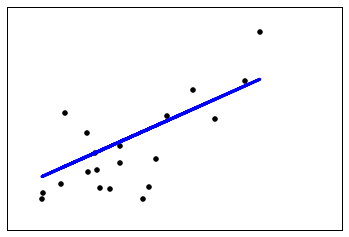

In [3]:
# OLS example
# Code source: Jaques Grobler
# License: BSD 3 clause

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [20]:
# np.newaxis adds one unit dimension for the array
a = np.random.rand(10, 3)
print(a.shape)
b = a[:,np.newaxis]
print(b.shape)
c = a[np.newaxis,:]
print(c.shape)
d = a[:,:,np.newaxis]
print(d.shape)
e = a[:,np.newaxis,:]
print(e.shape)

(10, 3)
(10, 1, 3)
(1, 10, 3)
(10, 3, 1)
(10, 1, 3)


Automatically created module for IPython interactive environment


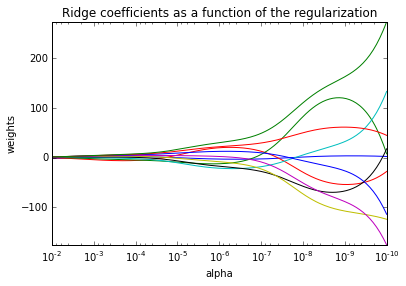

In [21]:
# Ridge Regression example
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [24]:
# array reverse
print(ax.get_xlim())
print(ax.get_xlim()[::-1])
a = np.array([0, 1, 2, 3])
print(a)
print(a[::-1])

(0.01, 1e-10)
(1e-10, 0.01)
[0 1 2 3]
[3 2 1 0]


In [25]:
# Ridge with built-in cross-validaiton
from sklearn import linear_model
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
clf.alpha_    

0.10000000000000001

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)
r^2 on test data : 0.384710
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute='auto',
      tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


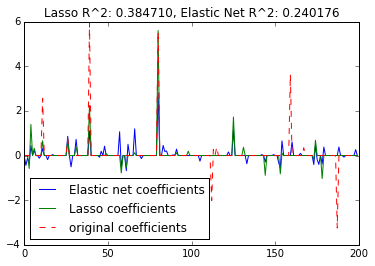

In [26]:
# Lasso and Elastic Net for Sparse Signals

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

###############################################################################
# generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

###############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

###############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, label='Elastic net coefficients')
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars lasso...

/Users/yanshi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log10
/Users/yanshi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:95: RuntimeWarning: divide by zero encountered in log10


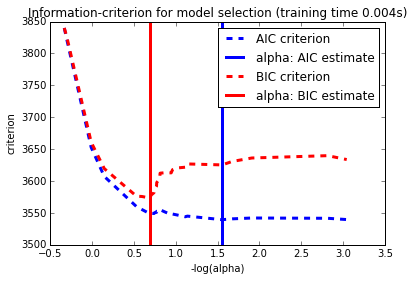

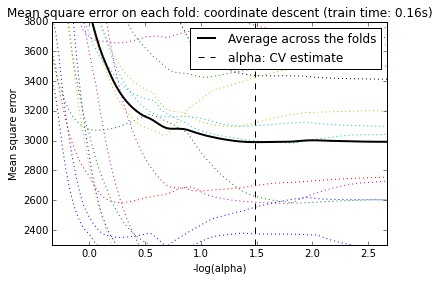

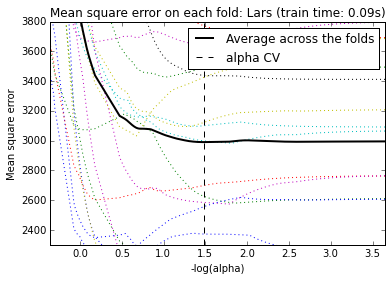

In [2]:
# Lasso model selection: Cross-Validation/AIC/BIC
# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause
% matplotlib inline
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

##############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

##############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

##############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.cv_mse_path_, ':')
plt.plot(m_log_alphas, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()